# Multi-Layer Perceptron

In this lab you will explore how to create and fit multi-layer perceptron (MLP) models to data.

In [20]:
import sklearn
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

from sklearn.neural_network import MLPClassifier


First we create a toy dataset using the `make_moons` function.

In [21]:
x,y = make_moons()

The data consists of 2D points and binary labels (0 or 1).

In [22]:
x[:5]

array([[ 1.8713187 ,  0.00928245],
       [ 0.77747907, -0.47492791],
       [ 1.71834935, -0.19568255],
       [ 1.46253829, -0.38659931],
       [ 0.67230089,  0.740278  ]])

In [23]:
y[:5]

array([1, 1, 1, 1, 0])

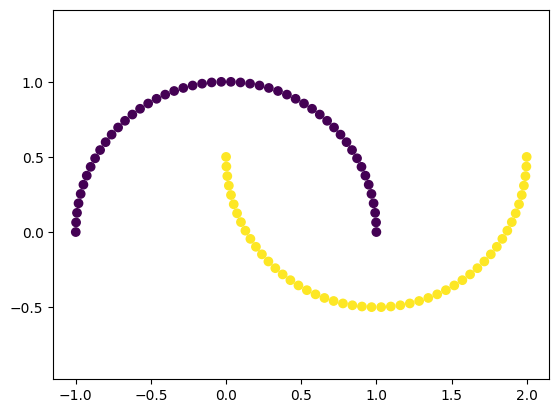

In [24]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.axis('equal')
plt.show()

First we will fit a linear classifier to this data, using the `LogisticRegression` class.

*(Even though it is called "regression," this model is for classification problems.)*

In [25]:
LR = LogisticRegression(penalty=None).fit(x,y)

The `predict` function predicts labels for input data. 

In [26]:
ypred = LR.predict(x)

In [27]:
ypred[:5]

array([1, 1, 1, 1, 0])

The `plot_decision_regions` function from `mlxtend` illustrates how a classification model divides the descriptor space into classes.

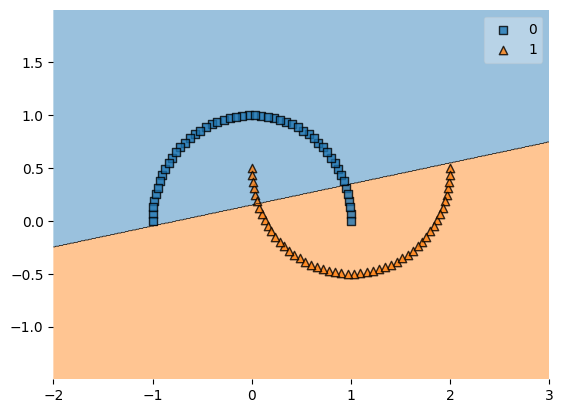

In [28]:
plot_decision_regions(x, y, clf=LR)
plt.show()

Clearly the linear model is unable to separate the moons dataset.

## Exercises

Now it's your turn -- try a MLP on this dataset!

1. Create an `MLPClassifier` and fit it to the moons dataset.  Leave the parameters at the default settings.

Calculate the accuracy on the training set and plot the decision regions.  

In [29]:
mlp = MLPClassifier().fit(x,y)

/Users/jventu09/Library/CloudStorage/OneDrive-CalPoly/Teaching/EE 428/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
mlp.score(x,y)

0.87

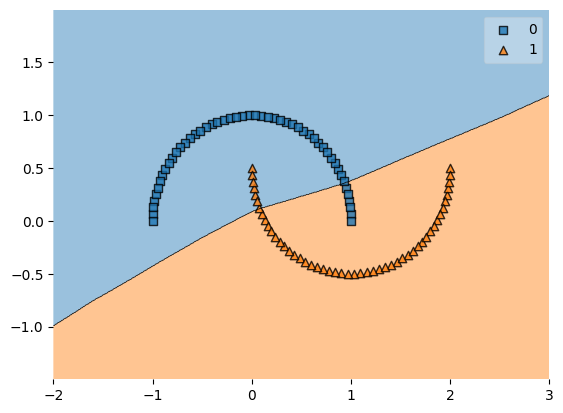

In [31]:
plot_decision_regions(x, y, clf=mlp)
plt.show()

2. Change the parameters of the model until you can reach 100% accuracy.

Here are some ideas: increase the hidden layer size and and add more hidden layers; increase the number of iterations; reduce the regularization strength (```alpha```).

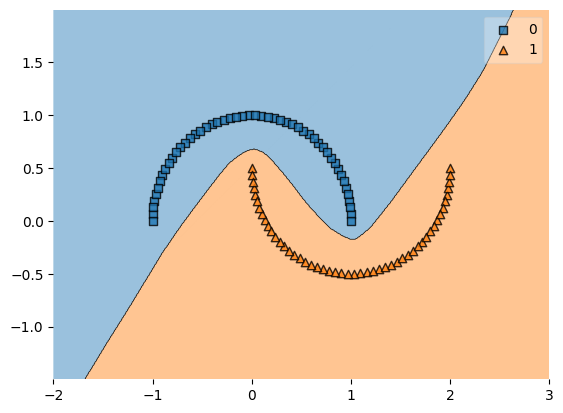

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000).fit(x,y)
mlp.score(x,y)
plot_decision_regions(x, y, clf=mlp)
plt.show()

Here I make some random data with three classes.

In [33]:
x = np.random.random(size=(100,2))
y = np.random.randint(3,size=(100))

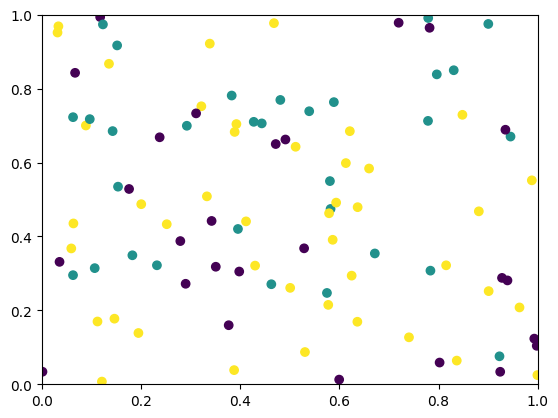

In [34]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

3. Plot the decision regions for the MLP with an increasing number of layers to show the effect of choosing a larger model versus a smaller model.

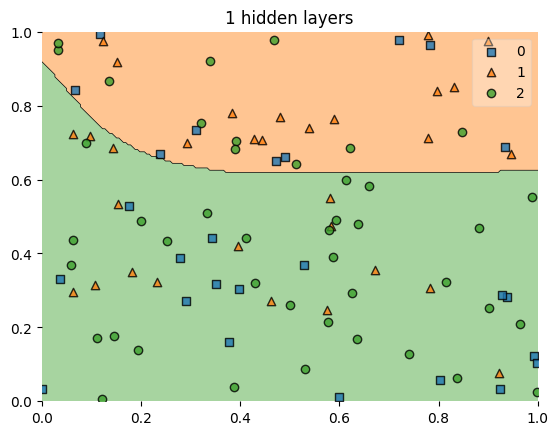

/Users/jventu09/Library/CloudStorage/OneDrive-CalPoly/Teaching/EE 428/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


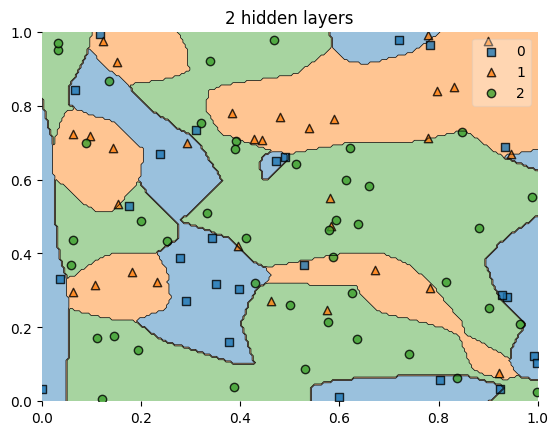

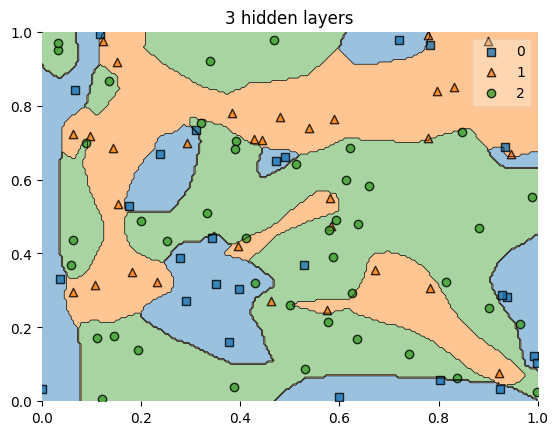

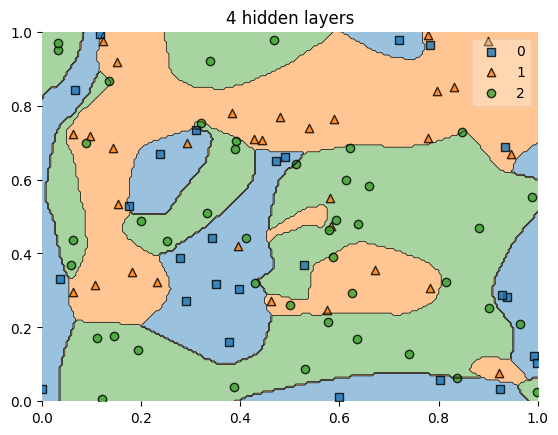

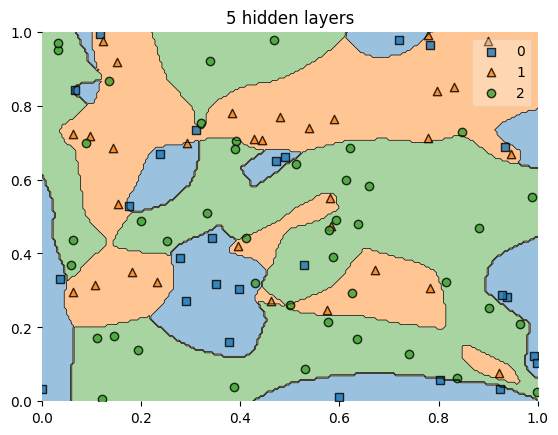

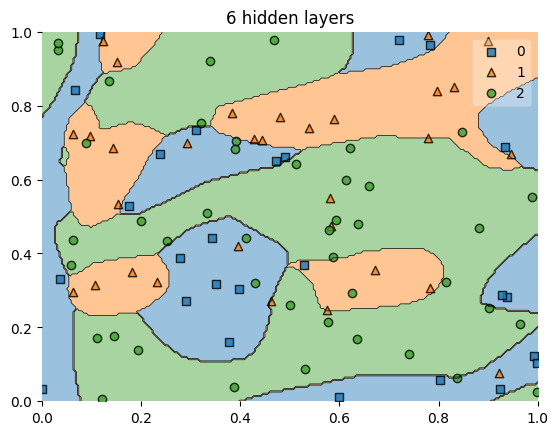

In [39]:
for i in range(1,7):
    hidden_layer_sizes = [200]*i
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,max_iter=1000,alpha=0).fit(x,y)
    plot_decision_regions(x, y, clf=mlp)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(f'{i} hidden layers')
    plt.show()

4. This time, use an MLP with three layers and 200 neurons per layer. Plot the decision regions as you increase regularization strength.

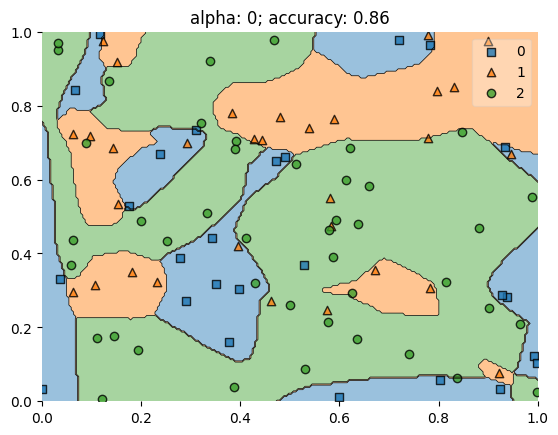

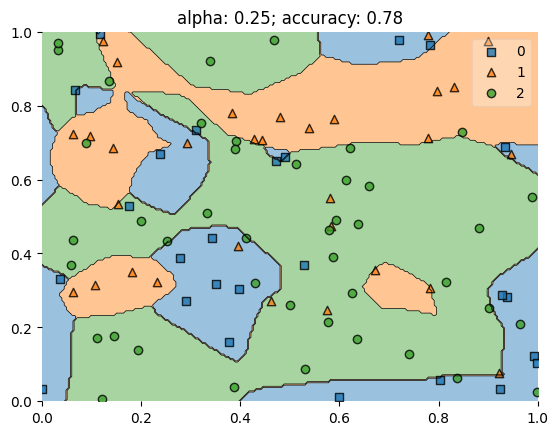

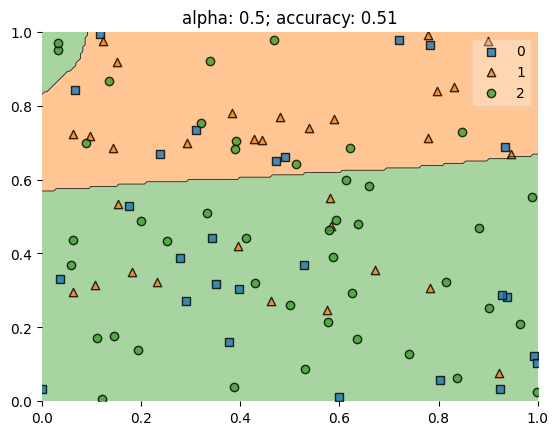

In [51]:
alphas = [0, .25, .5]
for alpha in alphas:
    mlp = MLPClassifier(hidden_layer_sizes=[200,200,200],max_iter=1000,alpha=alpha).fit(x,y)
    acc = mlp.score(x,y)
    plot_decision_regions(x, y, clf=mlp)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(f'alpha: {alpha}; accuracy: {acc}')
    plt.show()